In [1]:
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
fonte = "MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.shape

(127380, 136)

In [4]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

# Porcentagem de participantes por idade 01

In [5]:
porcent = (dados['NU_IDADE'].value_counts() / dados['NU_IDADE'].value_counts().sum()) * 100
# Ou dados.query('NU_IDADE == 13')['SG_UF-RESIDENCIA'].value_counts(normalize = True)

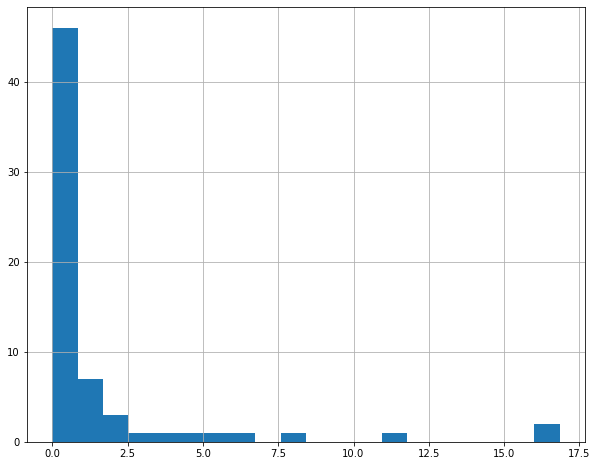

In [6]:
porcent.hist(bins = 20, figsize = (10, 8))

# Graficos

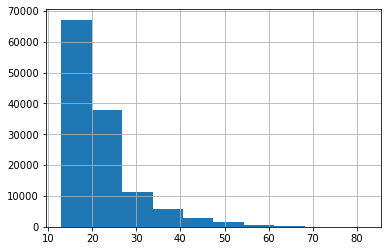

In [7]:
dados['NU_IDADE'].hist()

# Aumentando o tamanho e dispersão do dado

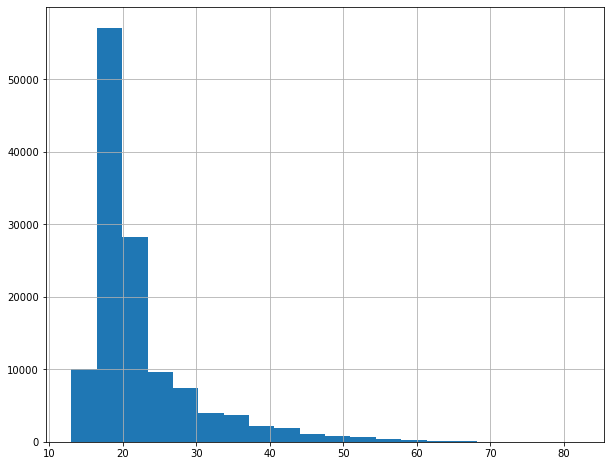

In [8]:
dados['NU_IDADE'].hist(bins = 20, figsize =(10, 8))

# DESCOBRINDO DE QUAL ESTADO SÃO OS DE 13 ANOS (DESAFIO 2)

In [9]:
dados[['NU_IDADE', 'SG_UF_RESIDENCIA']]

,NU_IDADE,SG_UF_RESIDENCIA
0,17,PA
1,23,PA
2,35,PA
3,23,PA
4,16,PA
...,...,...
127375,17,MG
127376,18,BA
127377,22,BA
127378,26,BA


In [10]:

dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA']

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

# ADICIONANDO TITULO NO GRAFICO 03

Text(0.5, 0.98, 'IDADES')

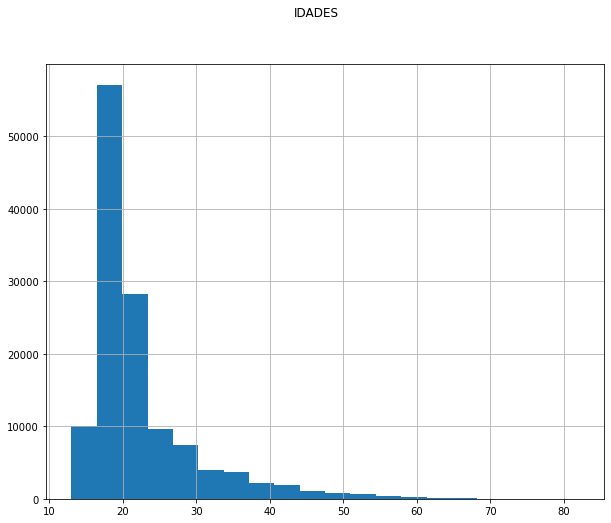

In [11]:
dados['NU_IDADE'].hist(bins = 20, figsize =(10, 8))
pl.suptitle("IDADES")

# Plotar os Histogramas das idades dos do treineiro e não treineiros 04

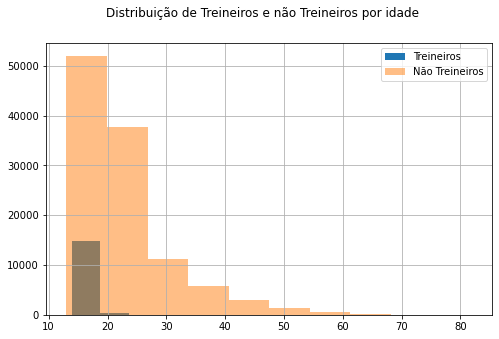

In [12]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(grid = True, figsize=(8, 5))
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(grid = True, figsize=(8, 5), alpha = 0.5)

pl.suptitle("Distribuição de Treineiros e não Treineiros por idade")
pl.legend(["Treineiros", "Não Treineiros"])

Text(0.5, 0.98, 'Distribuição de Treineiros por idade')

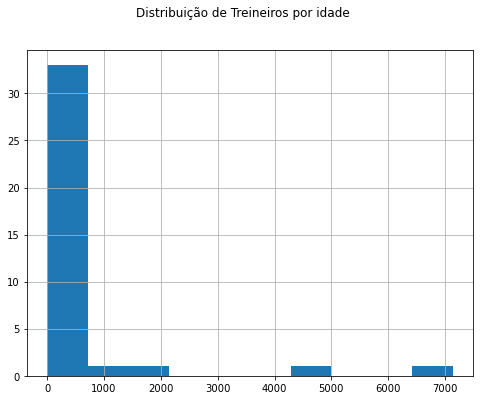

In [13]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().hist(grid = True, figsize=(8,6))
pl.suptitle("Distribuição de Treineiros por idade")

Text(0.5, 0.98, 'Distribuição de NÃO Treineiros por idade')

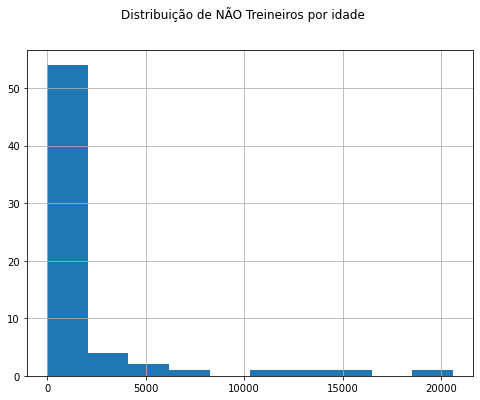

In [14]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().hist(grid = True, figsize=(8,6))
pl.suptitle("Distribuição de NÃO Treineiros por idade")

# Continuação

## MÉDIA

In [15]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

## Desvio Padrão

In [16]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

## Tabela de dados

In [17]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


* 50% -> Mediana
* 25% -> Mediana abaixo da mediana de 50 
* 75% -> Mediana acima da mediana de 50

### Tirando a mediana de 10%


In [18]:
dados["NU_NOTA_LC"].quantile(0.9)

596.3

### Tirando a mediana de 90%

In [19]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

# Comparar as distribuições das provas em inglês espanhol 05


### Provas de inglês

Text(0.5, 0.98, 'INGLÊS')

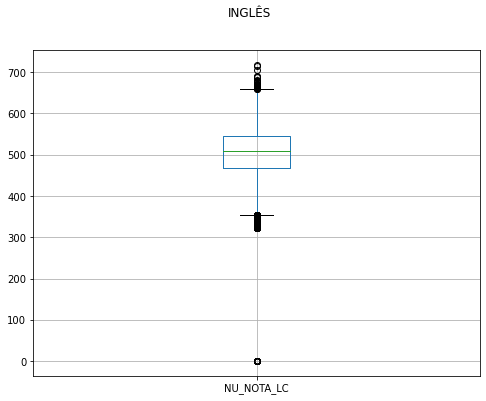

In [20]:
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))
pl.suptitle("INGLÊS")

## Provas de Espanhol

Text(0.5, 0.98, 'ESPANHOL')

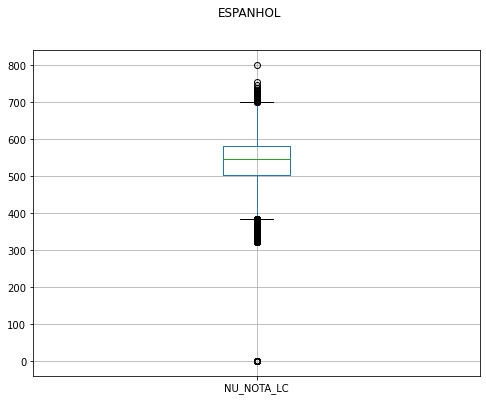

In [21]:
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))
pl.suptitle("ESPANHOL")

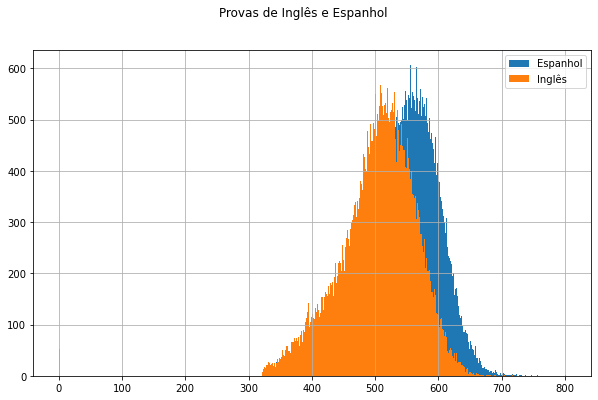

In [22]:
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].hist(bins = 500, figsize = (10, 6))
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].hist(bins = 500, figsize = (10, 6))

pl.suptitle("Provas de Inglês e Espanhol")
pl.legend(["Espanhol", "Inglês"])

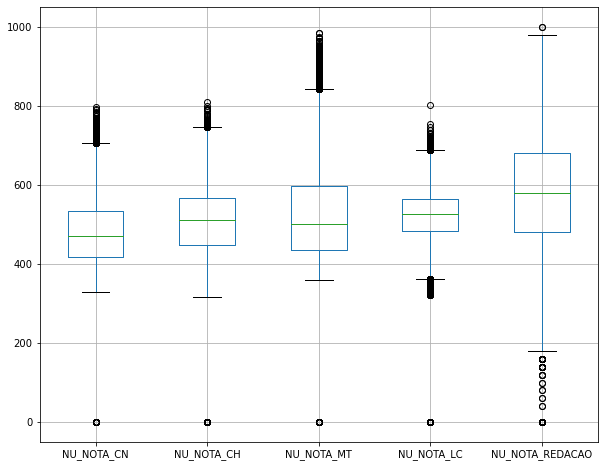

In [23]:
dados[provas].boxplot(grid = True, figsize = (10,8))

# AULA 2

normalize = True retorna a porcentagem dos dados

In [24]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize = True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PB    0.048276
GO    0.048276
PI    0.048276
AM    0.027586
MT    0.027586
DF    0.027586
PR    0.020690
TO    0.020690
SE    0.020690
AL    0.013793
RO    0.013793
SC    0.013793
AC    0.006897
RS    0.006897
ES    0.006897
RJ    0.006897
MS    0.006897
RN    0.006897
AP    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

### Plotagem em Pizza

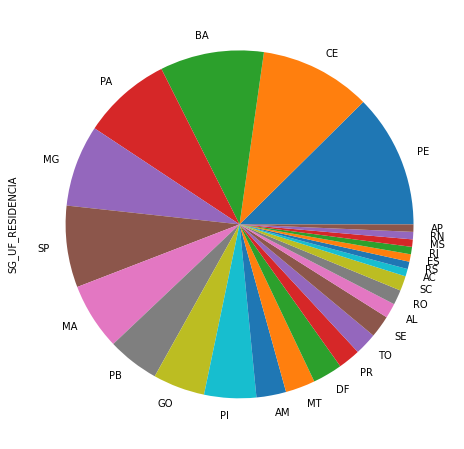

In [25]:
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))

## Desafio 01: Aumentar o dado para menores de idade por estado

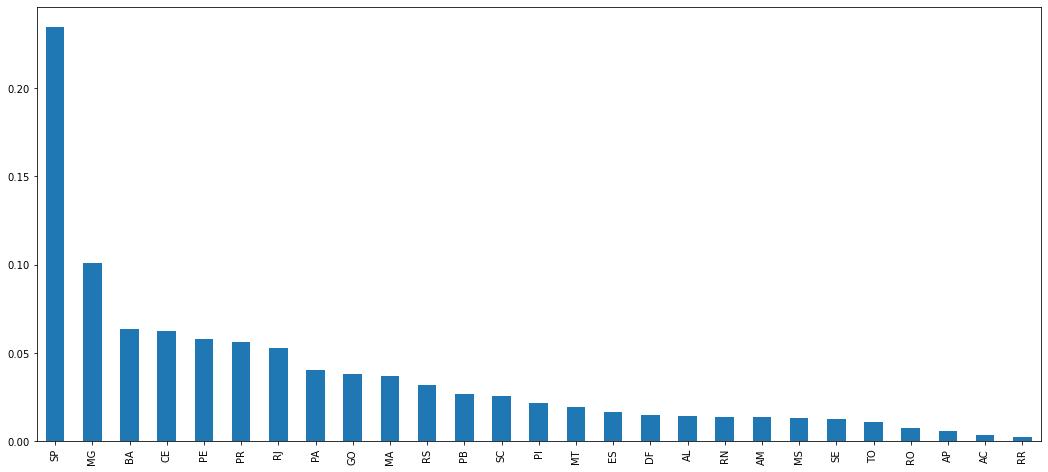

In [26]:
menores_de_idade = dados.query("NU_IDADE <=17")
menores_de_idade["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize = (18, 8))

### Plotagem em Barras

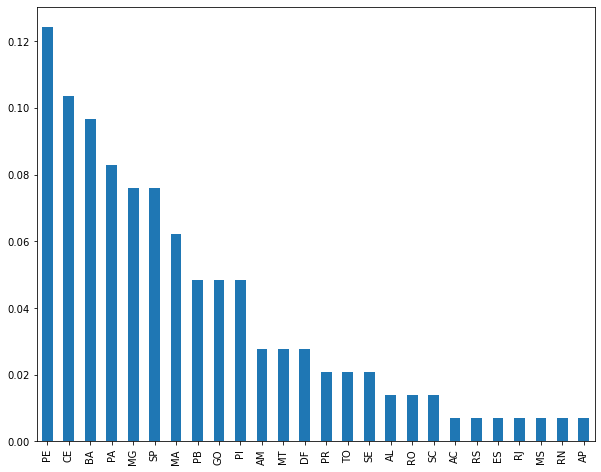

In [27]:
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))


# Usando a renda (Q006) para mostrar a diferença entre as notas 

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'BOXPLOT DE NOTAS DE MATEMÁTICA POR RENDA')

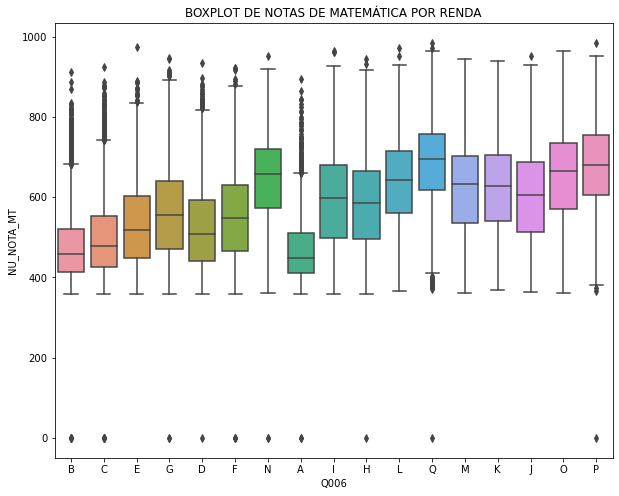

In [29]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados)
plt.title("BOXPLOT DE NOTAS DE MATEMÁTICA POR RENDA")

In [30]:
renda_unica = dados["Q006"].unique()
renda_unica.sort()

Text(0.5, 1.0, 'BOXPLOT DE NOTAS DE MATEMÁTICA POR RENDA')

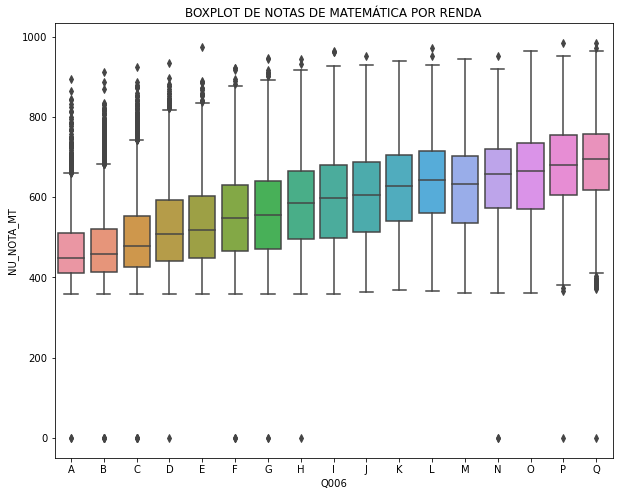

In [31]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados, order = renda_unica)
plt.title("BOXPLOT DE NOTAS DE MATEMÁTICA POR RENDA")

### Tirando a soma de todas as provas e adicionando à tabela

In [32]:
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [33]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


## Plotando a nota total por renda

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

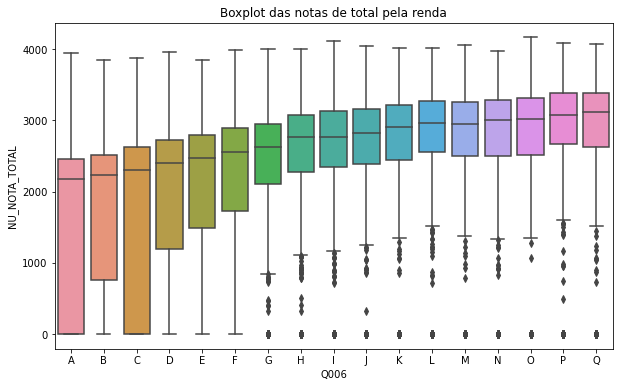

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_unica)
plt.title("Boxplot das notas de total pela renda")

### Graficamente

In [35]:
sns.displot(dados, x = "NU_NOTA_TOTAL")

AttributeError: module 'seaborn' has no attribute 'displot'

# Crie uma função para plotar o Boxplot do Seaborn

In [36]:
def Boxplot(x, y, dados, ordem = True):
    plt.figure(figsize=(10, 6))
    if ordem:
        m = dados[x].unique()
        m.sort()
    else:
        m = dados[x].unique()
    sns.boxplot(x = x, y = y, data = dados, order = m)
    plt.title("Boxplot das "+ x + " pela "+ y)

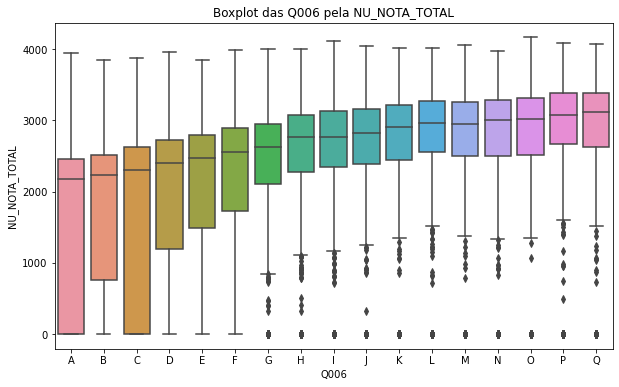

In [37]:
Boxplot("Q006", "NU_NOTA_TOTAL", dados, ordem = True)

### Descobrindo quais não tem nota

In [38]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


## Desafio 4: Verificar se quem zerou foi por falta ou eliminação

In [39]:
p = ["NU_NOTA_CN", "TP_PRESENCA_CN"]
dados[p].query("TP_PRESENCA_CN == 0")

,NU_NOTA_CN,TP_PRESENCA_CN
1,NaN,0
10,NaN,0
11,NaN,0
26,NaN,0
38,NaN,0
...,...,...
127366,NaN,0
127368,NaN,0
127369,NaN,0
127374,NaN,0


In [40]:
p = ["NU_NOTA_CN", "TP_PRESENCA_CN"]
dados[p].query("TP_PRESENCA_CN == 2")

,NU_NOTA_CN,TP_PRESENCA_CN
1784,NaN,2
2867,NaN,2
3411,NaN,2
5970,NaN,2
15619,NaN,2
16756,NaN,2
17035,NaN,2
24936,NaN,2
25454,NaN,2
27360,NaN,2


#### Os participantes irão receber "NaN" tendo faltado ou sendo eliminados

### Diferente de zero

In [41]:
dados_sem_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

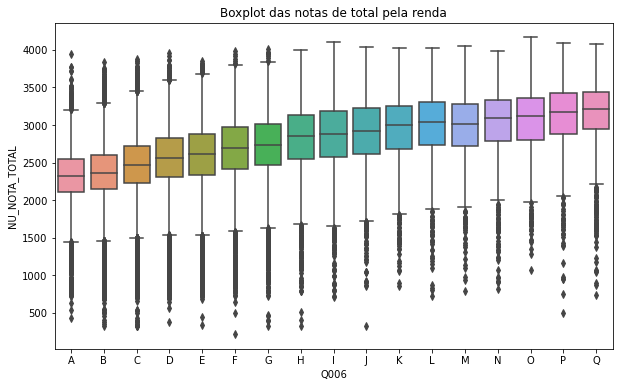

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_zero, order = renda_unica)
plt.title("Boxplot das notas de total pela renda")

### Mostrando as notas por Renda e Treineiros e não Treineiros

Text(0.5, 1.0, 'BOXPLOT DE NOTA POR RENDA COM DISTINÇÃO ENTRE TREINEIROS OU NÃO')

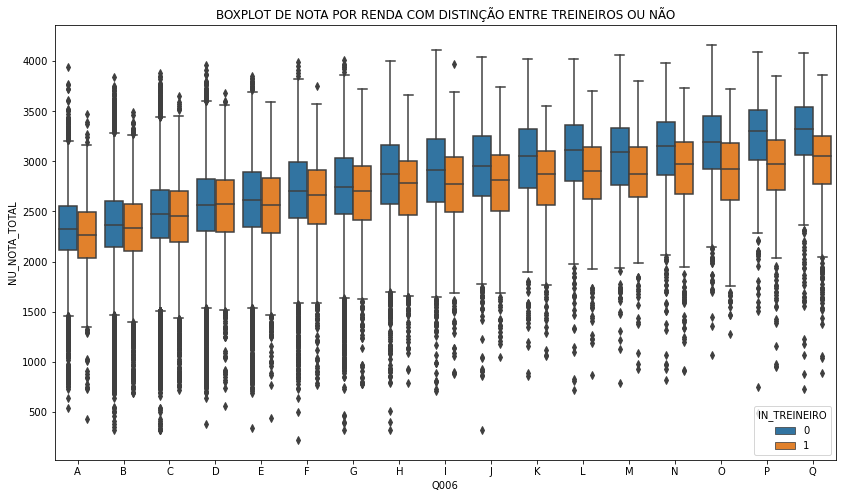

In [43]:
plt.figure(figsize = (14,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL", data = dados_sem_zero,  hue = "IN_TREINEIRO",
            order = renda_unica)
plt.title("BOXPLOT DE NOTA POR RENDA COM DISTINÇÃO ENTRE TREINEIROS OU NÃO")

# Desafio 06: Proporção por renda de treineiros e não treineiros

In [44]:
dados_treineiros = dados.query("IN_TREINEIRO == 1")
dados_nao_treineiros = dados.query("IN_TREINEIRO == 0")

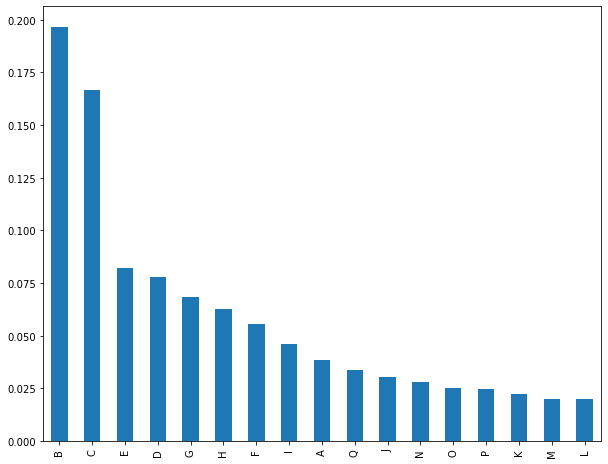

In [45]:
dados_treineiros["Q006"].value_counts(normalize = True).plot.bar(figsize=(10,8))


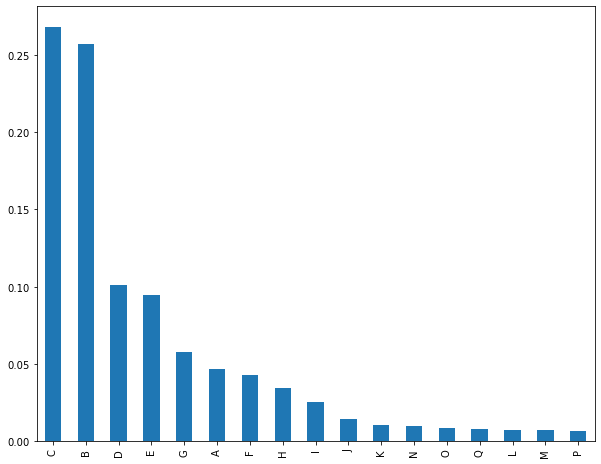

In [46]:
dados_nao_treineiros["Q006"].value_counts(normalize = True).plot.bar(figsize=(10,8))

#### Os treineiros e não treineiros estão bem distruibuidos nas classes B e C, mas nota-se um aumento na participação de treineiros nas classes mais altas

 # Desafio 07: Q025 (Internet) comparando a nota total e a renda

Text(0.5, 1.0, 'BOXPLOT DE NOTA POR RENDA COM DISTINÇÃO ENTRE TER INTERNET EM CASA OU NÃO')

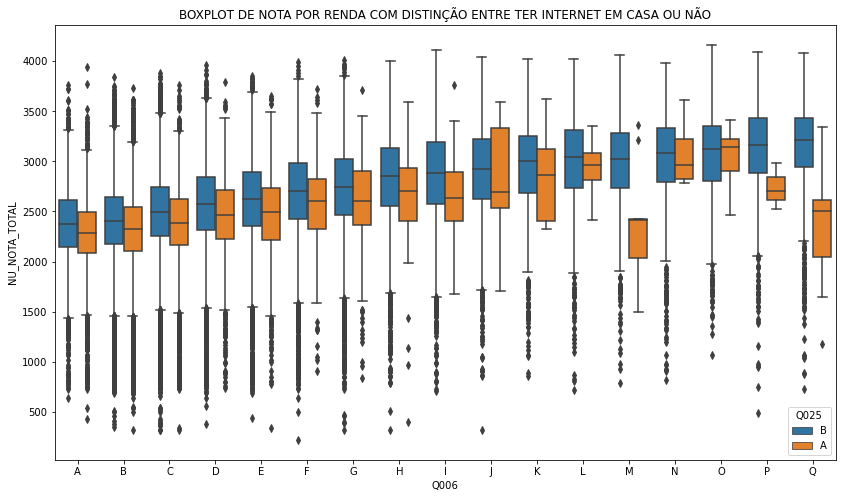

In [47]:
plt.figure(figsize = (14,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL", data = dados_sem_zero,  hue = "Q025",
            order = renda_unica)
plt.title("BOXPLOT DE NOTA POR RENDA COM DISTINÇÃO ENTRE TER INTERNET EM CASA OU NÃO")

### Quem não tem internet em casa, há a ocorrência das notas abaixarem consideravelmente 

# AULA 3

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 864x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")